## Python数据分析分享--示例1

### 导入数据

In [1]:
import pandas as pd

data_url = "https://raw.githubusercontent.com/alstat/Analysis-with-Programming/master/2014/Python/Numerical-Descriptions-of-the-Data/data.csv"
df = pd.read_csv(data_url)

### 查看数据

In [2]:
print(df.head())

    Abra  Apayao  Benguet  Ifugao  Kalinga
0   1243    2934      148    3300    10553
1   4158    9235     4287    8063    35257
2   1787    1922     1955    1074     4544
3  17152   14501     3536   19607    31687
4   1266    2385     2530    3315     8520


In [3]:
print(df.tail())

     Abra  Apayao  Benguet  Ifugao  Kalinga
74   2505   20878     3519   19737    16513
75  60303   40065     7062   19422    61808
76   6311    6756     3561   15910    23349
77  13345   38902     2583   11096    68663
78   2623   18264     3745   16787    16900


### 查看列名和行名

In [4]:
print(df.columns)

Index(['Abra', 'Apayao', 'Benguet', 'Ifugao', 'Kalinga'], dtype='object')


In [5]:
print(df.index)

RangeIndex(start=0, stop=79, step=1)


### 几种基本的数据操作

#### 数据转置

In [6]:
print(df.T)

            0      1     2      3     4      5     6      7     8      9   \
Abra      1243   4158  1787  17152  1266   5576   927  21540  1039   5424   
Apayao    2934   9235  1922  14501  2385   7452  1099  17038  1382  10588   
Benguet    148   4287  1955   3536  2530    771  2796   2463  2592   1064   
Ifugao    3300   8063  1074  19607  3315  13134  5134  14226  6842  13828   
Kalinga  10553  35257  4544  31687  8520  28252  3106  36238  4973  40140   

         ...       69     70     71     72     73     74     75     76     77  \
Abra     ...    12763   2470  59094   6209  13316   2505  60303   6311  13345   
Apayao   ...    37625  19532  35126   6335  38613  20878  40065   6756  38902   
Benguet  ...     2354   4045   5987   3530   2585   3519   7062   3561   2583   
Ifugao   ...     9838  17125  18940  15560   7746  19737  19422  15910  11096   
Kalinga  ...    65782  15279  52437  24385  66148  16513  61808  23349  68663   

            78  
Abra      2623  
Apayao   18264  

#### 数据部分提取或删除

Python中可以使用`iloc`属性进行提取。如提取数据第一列前5行：

In [7]:
print(df.iloc[:,0].head())

0     1243
1     4158
2     1787
3    17152
4     1266
Name: Abra, dtype: int64


提取数据第11到20行的前4列数据：

In [8]:
print(df.iloc[10:20,0:4])

     Abra  Apayao  Benguet  Ifugao
10    981    1311     2560    5078
11  27366   15093     3039   14206
12   1100    1701     2382    6750
13   7212   11001     1088   14774
14   1048    1427     2847    5526
15  25679   15661     2942   14452
16   1055    2191     2119    5882
17   5437    6461      734   10477
18   1029    1183     2302    6438
19  23710   12222     2598    8446


删除前两列，使用`drop`属性；并设置`axis`参数，`axis = 0`表示删除行，`axis = 1`表示删除列。

In [9]:
print(df.drop(df.columns[[0,1]], axis = 1).head())

   Benguet  Ifugao  Kalinga
0      148    3300    10553
1     4287    8063    35257
2     1955    1074     4544
3     3536   19607    31687
4     2530    3315     8520


### 基本统计描述

使用`describe`属性，可对数据进行基本的统计描述。

In [10]:
print(df.describe())

               Abra        Apayao      Benguet        Ifugao       Kalinga
count     79.000000     79.000000    79.000000     79.000000     79.000000
mean   12874.379747  16860.645570  3237.392405  12414.620253  30446.417722
std    16746.466945  15448.153794  1588.536429   5034.282019  22245.707692
min      927.000000    401.000000   148.000000   1074.000000   2346.000000
25%     1524.000000   3435.500000  2328.000000   8205.000000   8601.500000
50%     5790.000000  10588.000000  3202.000000  13044.000000  24494.000000
75%    13330.500000  33289.000000  3918.500000  16099.500000  52510.500000
max    60303.000000  54625.000000  8813.000000  21031.000000  68663.000000


### 假设检验

常用`scipy`包中的`stats`来进行一些基本的统计推断。假设`Abra`总体均值为15000，那么可对`Abra`列进行单样本t检验：

In [11]:
from scipy import stats as ss

print(ss.ttest_1samp(a = df.loc[:,'Abra'],popmean = 15000))

Ttest_1sampResult(statistic=-1.1281738488299586, pvalue=0.26270472069109496)


假设所有列的总体均值均为15000，对所有变量进行单样本t检验：

In [12]:
print(ss.ttest_1samp(a = df, popmean = 15000))

Ttest_1sampResult(statistic=array([ -1.12817385,   1.07053437, -65.81425599,  -4.564575  ,   6.17156198]), pvalue=array([  2.62704721e-01,   2.87680340e-01,   4.15643528e-70,
         1.83764399e-05,   2.82461897e-08]))


### 简单可视化

`matplotlib`模块是Python中常用的可视化模块。简单的箱线图如下：

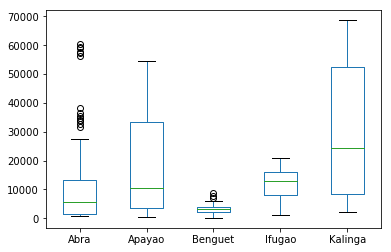

In [13]:
import matplotlib.pyplot as plt

plt.show(df.plot(kind = 'box'))

也可以使用`pandas`模块中集成的R语言的`ggplot`主题来对图表进行美化。

Axes(0.125,0.125;0.775x0.755)


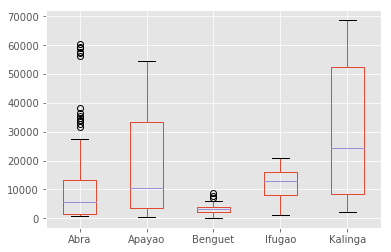

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')
print(df.plot(kind = 'box'))

同样的，可使用其他模块绘制：

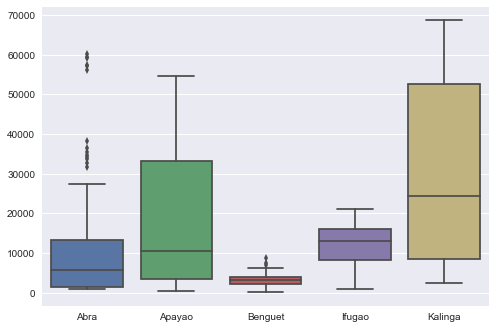

In [18]:
%matplotlib inline
import seaborn as sns

sns.boxplot(data=df)

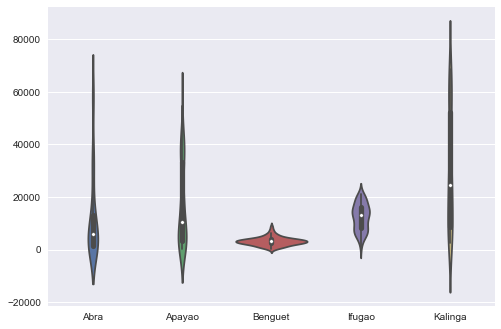

In [21]:
sns.violinplot(data = df)

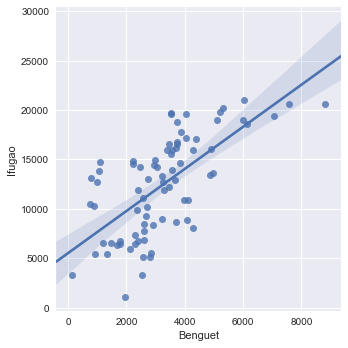

In [23]:
sns.lmplot("Benguet","Ifugao",df)